# Science Advances Revisions

In [36]:
from dask.distributed import Client
client = Client(scheduler_file='/rigel/home/jb3210/scheduler.json')

In [37]:
client#.restart()

Client Scheduler: tcp://10.43.5.51:8786 Dashboard: http://10.43.5.51:8787,Cluster Workers: 83 Cores: 332 Memory: 996.00 GB


In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [41]:
import dask
dask.__version__

'0.16.0'

In [38]:
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.3.final.0
python-bits: 64
OS: Linux
OS-release: 3.10.0-327.el7.x86_64
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

xarray: 0.10.0-8-g5e80189
pandas: 0.21.0
numpy: 1.13.3
scipy: 1.0.0
netCDF4: 1.3.1
h5netcdf: None
Nio: None
bottleneck: None
cyordereddict: None
dask: 0.16.0
matplotlib: 2.1.1
cartopy: 0.15.1
seaborn: 0.8.1
setuptools: 38.2.4
pip: 9.0.1
conda: None
pytest: 3.3.1
IPython: 6.2.1
sphinx: None


In [4]:
from xmitgcm import open_mdsdataset

In [5]:
import xgcm
xgcm

<module 'xgcm' from '/rigel/home/jb3210/src/xgcm/xgcm/__init__.py'>

In [6]:
ddir = '/rigel/ocp/users/jb3210/projects/aviso_surface_tracer/runs'
# run = 'run_KOC_PSI_variance_budget'
# run = 'run_KOC_PSI_variance_budget_new'
run = 'run_KOC_LAT_variance_budget_new'
rundir = os.path.join(ddir,run)
timestep = 900 # in seconds
kappa = 63

In [7]:
ds = open_mdsdataset(rundir, prefix=['tracer_diags', 'vel_diags'],
                     delta_t=timestep, ref_date='1993-01-01')
ds

/rigel/home/jb3210/src/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/rigel/home/jb3210/src/xmitgcm/xmitgcm/mds_store.py:220: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 292)
Coordinates:
  * XC        (XC) float32 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 ...
  * YC        (YC) float32 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XG        (XG) float32 -2.77556e-17 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
  * YG        (YG) float32 -80.0 -79.9 -79.8 -79.7 -79.6 -79.5 -79.4 -79.3 ...
  * Z         (Z) float32 -50.0
  * Zp1       (Zp1) float32 0.0 -100.0
  * Zu        (Zu) float32 -100.0
  * Zl        (Zl) float32 0.0
    rA        (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dxG       (YG, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dyG       (YC, XG) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    Depth     (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    rAz       (YG, XG) float32 dask.array<shape=(1600, 3600), chunksize=(160

In [8]:
vars_to_drop = [vname for vname in ds.variables if '02' in vname]
ds = ds.drop(vars_to_drop)
ds

<xarray.Dataset>
Dimensions:   (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 292)
Coordinates:
  * XC        (XC) float32 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 ...
  * YC        (YC) float32 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XG        (XG) float32 -2.77556e-17 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
  * YG        (YG) float32 -80.0 -79.9 -79.8 -79.7 -79.6 -79.5 -79.4 -79.3 ...
  * Z         (Z) float32 -50.0
  * Zp1       (Zp1) float32 0.0 -100.0
  * Zu        (Zu) float32 -100.0
  * Zl        (Zl) float32 0.0
    rA        (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dxG       (YG, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dyG       (YC, XG) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    Depth     (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    rAz       (YG, XG) float32 dask.array<shape=(1600, 3600), chunksize=(160

In [9]:
ds.nbytes/1e9

107.919406316

In [10]:
dsp = ds.persist()
# dsp = ds

In [11]:
ds_snap = open_mdsdataset(rundir, prefix=['tracer_snapshots'],
                          delta_t=timestep, ref_date='1993-01-01').persist()
ds_snap

/rigel/home/jb3210/src/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/rigel/home/jb3210/src/xmitgcm/xmitgcm/mds_store.py:220: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 293)
Coordinates:
  * XC        (XC) float32 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 ...
  * YC        (YC) float32 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XG        (XG) float32 -2.77556e-17 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
  * YG        (YG) float32 -80.0 -79.9 -79.8 -79.7 -79.6 -79.5 -79.4 -79.3 ...
  * Z         (Z) float32 -50.0
  * Zp1       (Zp1) float32 0.0 -100.0
  * Zu        (Zu) float32 -100.0
  * Zl        (Zl) float32 0.0
    rA        (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dxG       (YG, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    dyG       (YC, XG) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    Depth     (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    rAz       (YG, XG) float32 dask.array<shape=(1600, 3600), chunksize=(160

In [12]:
# reused input for all budgets
# delta_t = dsp.time[0].values # Ryans version, caused some problems
delta_t = dsp.iter[0].values*timestep
regions = {'agulhas': {'XC': slice(0,50), 'YC': slice(-70, -30)},
           'eq_pacific': {'XC': slice(180, 230), 'YC': slice(-10, 30)},
           'gulf_stream': {'XC': slice(280, 320), 'YC': slice(20, 50)}}
grid = xgcm.Grid(dsp)
grid

<xgcm.Grid>
X Axis (periodic):
  * center   XC (3600) --> left
  * left     XG (3600) --> center
Z Axis (periodic):
  * center   Z (1) --> left
  * left     Zl (1) --> center
  * outer    Zp1 (2) --> center
  * right    Zu (1) --> center
T Axis (periodic):
  * center   time (292)
Y Axis (periodic):
  * center   YC (1600) --> left
  * left     YG (1600) --> center

# First Quality Control

In [13]:
def reset_cut(reset_frq, reset_pha, dt_model, dt_tracer, iters, cut_time):
    """
    determine the timing of reset and define cut index
    Based on the information in the modelparameters this routine translates
    the reset time in second to iterations and constructs an index, matching
    a passed array which can then be used as a mask
    Input:  reset_frq - frequency of reset in seconds
            reset_pha - phase of reset in seconds
            dt_model - timestep of model in seconds
            dt_tracer - timestep of tracer output
            iters - numpy array of iterations on which index is constructed
            cut_time = [in seconds] time after (before; if negative number)
            the reset that should be masked by
    Output: mask -
            reset_iters -
            reset_time -
    """
    reset_time = np.array(range(reset_pha,
                                (iters.max()*dt_model)+dt_model,
                                reset_frq),
                          dtype=int)

    # iteration 0 is always considered a reset
    if not reset_time[0] == 0:
        reset_time = np.concatenate((np.array([0]), reset_time))

    # ceil the values if reset times dont divide without remainder
    # That way for snapshots the reset is evaluating the first snapshot
    # after the reset and for averages it ensures that the 'reset average'
    # contains the actual reset time
    reset_iters = np.ceil(reset_time/float(dt_model))
    # round iters to nearest tracer iters
    tracer_iters = float(dt_tracer)/float(dt_model)
    reset_iters = np.ceil(reset_iters/tracer_iters)*tracer_iters
    # remove iters that are bigger then iter max
    while reset_iters[-1] > iters.max():
        reset_iters = reset_iters[0:-1]

    # translate cut time to iters (round down)
    cut = np.ceil(cut_time/float(dt_model))
    mask = np.ones_like(iters)
    for ii in reset_iters:
        if cut_time < 0:
            idx = np.logical_and(iters > (ii+cut), iters <= ii)
        else:
            idx = np.logical_and(iters >= ii, iters < (ii+cut))
        mask[idx] = 0
    return mask, reset_iters, reset_time

def paramReadout(directory):
    # TODO write test
    '''cheap implementation to read out the data* files from mitgcm dir'''
    directory
    params = dict(check=[])
    for dfile in ['data', 'data.ptracers', 'data.diagnostics']:
        for line in open(directory+dfile):
            if '&' not in line and '#' not in line and '\n' not in line[0]:
                line_out = (line.replace('\n', '')
                            .replace(' ', '')
                            .split('=')
                            )
                if len(line_out) == 2 and len(line_out[1]) > 1:
                    while line_out[1][-1] in ['.', ',']:
                        line_out[1] = line_out[1][0:-1]
                        while line_out[1][-1] in ['.', ',']:
                            line_out[1] = line_out[1][0:-1]
                    params[dfile+'/'+line_out[0]] = line_out[1]
    return params

# def model_params(params):
    
# TODO: write this with os.path....this is hella bad

In [14]:
#TODO:
# Stack the tracer budget according to reset ...with that we can quantify when the budget'spun up'


In [15]:
params = paramReadout(rundir+'/')
tracernum = np.arange(int(params['data.ptracers/PTRACERS_numInUse']))+1
dt_model = int(float(params['data/deltaTtracer']))
total_iters_model = int(float(params['data/nTimeSteps']))

tr = 1
reset_frq = int(params['data.ptracers/PTRACERS_resetFreq('+str(tr)+')'])
reset_pha = int(params['data.ptracers/PTRACERS_resetPhase('+str(tr)+')'])
dt_tracer = abs(int(float(params['data.diagnostics/frequency('+str(tr)+')'])))
iters = dsp.iter.data.compute()
cut_time = 1*30*24*60*60+1

In [16]:
mask, reset_iters, reset_time = reset_cut(reset_frq, reset_pha, dt_model, dt_tracer, iters, cut_time)

In [17]:
reset_mask = dsp['time'].copy()
reset_mask = reset_mask.rename('reset_mask')
reset_mask.data = mask
reset_mask.coords['time'].data = dsp['time'].data
reset_mask

<xarray.DataArray 'reset_mask' (time: 292)>
array([0, 1, 1, ..., 1, 1, 1])
Coordinates:
    iter     (time) int64 dask.array<shape=(292,), chunksize=(1,)>
  * time     (time) datetime64[ns] 1993-01-31 1993-03-02 1993-04-01 ...
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

In [18]:
tr01sq_snap = ds_snap.TRACSQ01.mean(dim=['YC', 'XC']).load()

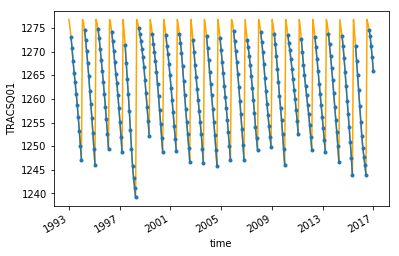

In [20]:
tr01sq_snap.plot(color='orange')
tr01sq_snap[1:].where(mask).plot(marker='.')

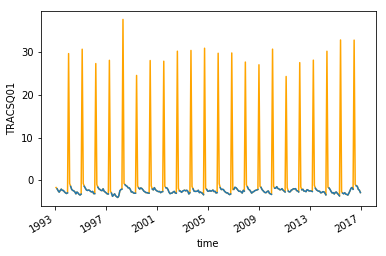

In [23]:
tr01sq_snap_diff = tr01sq_snap.diff(dim='time')
tr01sq_snap_diff.plot(color='orange')
tr01sq_snap_diff.where(mask).plot()

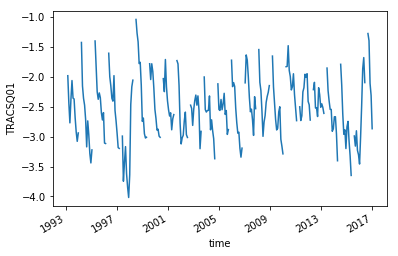

In [25]:
tr01sq_snap_diff.where(mask).plot()

## Tracer Budget

$$ \frac{\partial q}{\partial t} = - \nabla \cdot (\mathbf{u} q) + q (\nabla \cdot \mathbf{u}) + \nabla \cdot \kappa \nabla q $$

The first two terms on the RHS represent advection.
We would like for the divergence term to be zero, but unfortunately this is not the case. It is key for closing the budget locally.

In [30]:
uflux = dsp.UTRAC01 * dsp['dyG']
vflux = dsp.VTRAC01 * dsp.dxG
div_adv_flux = (grid.diff(uflux, 'X') + grid.diff(vflux, 'Y')) / dsp.rA
div_adv_flux

distributed.utils - ERROR - Timed out trying to connect to 'tcp://10.43.5.51:8786' after 3 s: connect() didn't finish in time
Traceback (most recent call last):
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/utils.py", line 238, in f
    result[0] = yield make_coro()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/client.py", line 1315, in _gather
    traceback)
  File "/rigel/home/jb32

OSError: Timed out trying to connect to 'tcp://10.43.5.51:8786' after 3 s: connect() didn't finish in time

In [27]:
# dsp.drF.load()

In [28]:
# just use constant dfF
drF = 100.
uflux_gad = dsp.ADVxTr01 / drF
vflux_gad = dsp.ADVyTr01 / drF
div_adv_flux_gad = (grid.diff(uflux_gad, 'X') + grid.diff(vflux_gad, 'Y')) / dsp.rA
div_adv_flux_gad

<xarray.DataArray (time: 292, YC: 1600, XC: 3600)>
dask.array<shape=(292, 1600, 3600), dtype=float32, chunksize=(1, 1600, 3600)>
Coordinates:
  * time     (time) datetime64[ns] 1993-01-31 1993-03-02 1993-04-01 ...
  * YC       (YC) float32 -79.95 -79.85 -79.75 -79.65 -79.55 -79.45 -79.35 ...
  * XC       (XC) float32 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 ...
    rA       (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    Depth    (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>
    hFacC    (YC, XC) float32 dask.array<shape=(1600, 3600), chunksize=(1600, 3600)>

In [29]:
uvelflux = dsp.UVEL * dsp.dyG * ds.hFacW
vvelflux = dsp.VVEL * dsp.dxG * ds.hFacS
div_vel_flux = (grid.diff(uvelflux, 'X') + grid.diff(vvelflux, 'Y')) / dsp.rA
trac_div_vel = dsp.TRAC01 * div_vel_flux
trac_div_vel

distributed.utils - ERROR - Timed out trying to connect to 'tcp://10.43.5.51:8786' after 3 s: connect() didn't finish in time
Traceback (most recent call last):
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/utils.py", line 238, in f
    result[0] = yield make_coro()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/client.py", line 1315, in _gather
    traceback)
  File "/rigel/home/jb32

OSError: Timed out trying to connect to 'tcp://10.43.5.51:8786' after 3 s: connect() didn't finish in time

In [ ]:
uflux_diff = -kappa * grid.diff(dsp.TRAC01, 'X') / dsp.dxC * dsp.dyG * dsp.hFacW
vflux_diff = -kappa * grid.diff(dsp.TRAC01, 'Y') / dsp.dyC * dsp.dxG * dsp.hFacS
div_diff_flux = (grid.diff(uflux_diff, 'X') + grid.diff(vflux_diff, 'Y')) / dsp.rA
div_diff_flux

In [ ]:
uflux_diff_gad = dsp.DFxETr01 / drF
vflux_diff_gad = dsp.DFyETr01 / drF
div_diff_flux_gad = (grid.diff(uflux_diff_gad, 'X') + grid.diff(vflux_diff_gad, 'Y')) / dsp.rA
div_diff_flux_gad

In [ ]:
dsp.time[0].values

In [ ]:
dqdt = ds_snap.TRAC01.diff(dim='time') / delta_t
dqdt

In [ ]:
# slam everything into a dataset
ds_budget = xr.Dataset({'tendency': dqdt,
                        'advection': div_adv_flux, 'advection_gad': div_adv_flux_gad,
                        'diffusion': div_diff_flux, 'diffusion_gad': div_diff_flux_gad,
                        'divergence': -trac_div_vel})
ds_budget

In [ ]:
ds_budget['residual'] = (ds_budget.tendency + ds_budget.advection
                         + ds_budget.diffusion + ds_budget.divergence)
ds_budget['residual_gad'] = (ds_budget.tendency + ds_budget.advection_gad
                             + ds_budget.diffusion_gad + ds_budget.divergence)

In [ ]:
# first look at first timestep
budget_first = ds_budget.isel(time=1)#.load()

In [ ]:
vmax = 2e-8

In [ ]:
plt.rcParams['figure.figsize'] = (9,6)

In [ ]:
terms = ['tendency', 'advection', 'diffusion', 'divergence', 'residual']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=3, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_first[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

In [ ]:
terms = ['tendency', 'advection_gad', 'diffusion_gad', 'divergence', 'residual_gad']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=3, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_first[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

In [ ]:
terms = ['advection', 'advection_gad', 'diffusion', 'diffusion_gad']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=2, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_first[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

In [ ]:
((budget_first**2)**0.5).mean()

In [ ]:
# now do the whole timeseries
budget_mean = ds_budget.where(reset_mask).mean(dim='time')#.load()

In [ ]:
((budget_mean**2)**0.5).mean()

In [ ]:
vmax = 1e-8
terms = ['tendency', 'advection', 'diffusion', 'divergence', 'residual']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=3, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_mean[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

In [ ]:
vmax = 1e-8
terms = ['tendency', 'advection_gad', 'diffusion_gad', 'divergence', 'residual_gad']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=3, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_mean[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

In [ ]:
terms = ['advection', 'advection_gad', 'diffusion', 'diffusion_gad']
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=2, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        budget_mean[term].sel(**region).plot(ax=ax, vmax=vmax, add_colorbar=False)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

## Variance Budget

We write it like

$$ \frac{\partial}{\partial t} \frac{q^2}{2} + \nabla \cdot \left ( \frac{ \mathbf{u} q^2}{2}  \right )
 - \frac{q^2}{2} \nabla \cdot \mathbf{u} - \nabla \cdot \kappa \nabla \frac{q^2}{2} + \kappa | \nabla q |^2 = 0 $$

In [ ]:
q2_uflux = dsp.UTrSq01 * dsp.dyG
q2_vflux = dsp.VTrSq01 * dsp.dxG
div_q2_adv_flux = (grid.diff(q2_uflux, 'X') + grid.diff(q2_vflux, 'Y')) / dsp.rA
div_q2_adv_flux

In [ ]:
# this is only approximate because we didn't save the eddy correlation
# of q with divergence
q2_div_vel = dsp.TRACSQ01 * div_vel_flux
q2_div_vel

In [ ]:
q2_udiff = -kappa * grid.diff(dsp.TRACSQ01, 'X') / dsp.dxC * dsp.dyG * dsp.hFacW
q2_vdiff = -kappa * grid.diff(dsp.TRACSQ01, 'Y') / dsp.dyC * dsp.dxG * dsp.hFacS
q2_div_diff_flux = (grid.diff(q2_udiff , 'X') + grid.diff(q2_vdiff, 'Y')) / dsp.rA
q2_div_diff_flux

In [ ]:
q2_dissipation = kappa * (grid.interp(dsp.DXSqTr01 * dsp.hFacW, 'X') +
                          grid.interp(dsp.DYSqTr01 * dsp.hFacS, 'Y'))
q2_dissipation

In [ ]:
dq2dt = ds_snap.TRACSQ01.diff(dim='time') / delta_t
dq2dt

In [ ]:
q2_budget = xr.Dataset({'tendency': dq2dt/2,
                        'advection': div_q2_adv_flux/2, 
                        'diffusion': q2_div_diff_flux/2,
                        'dissipation': q2_dissipation,
                        'divergence': -q2_div_vel/2})
q2_budget['residual'] = (q2_budget.tendency + q2_budget.advection +
                         q2_budget.diffusion + q2_budget.dissipation +
                         q2_budget.divergence)
q2_budget

In [ ]:
q2_budget_mean = q2_budget.where(reset_mask).mean(dim='time')#.load()

In [ ]:
((q2_budget_mean * dsp.rA).sum() / dsp.rA.sum())#.load()

In [ ]:
terms = ['tendency', 'advection', 'diffusion', 'dissipation', 'divergence', 'residual']
vmax = 2e-9
plot_kwargs = dict(vmax=vmax, vmin=-vmax, cmap='RdBu_r', add_colorbar=False)
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=3, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        q2_budget_mean[term].sel(**region).plot(ax=ax, **plot_kwargs)
        ax.set_title(term + ' - ' + region_name)
    fig.tight_layout()

## Eddy Variance Budget

$$ \frac{\partial}{\partial t} \frac{\overline{{q'}^2}}{2}
+ \nabla \cdot \left ( \frac{ \overline{ \mathbf{u} {q'}^2 }}{2}  \right )
 - \overline{\frac{{q'}^2}{2} \nabla \cdot \mathbf{u}}
 + \overline{\mathbf{u}'q'} \cdot \nabla \overline{q} 
 - \nabla \cdot \kappa \nabla \frac{\overline{{q'}^2}}{2}
 + \kappa \overline{ | \nabla q' |^2 } = 0 $$
 
 The overbar is defined as a mean over a number of months and a spatial smoothing by convolution.
 Th time mean is done online. The smoothing we do here.
 Because convolution comutes with time average, it doesn't matter the order we do these operations.

In [31]:
# definie smoothing operator
from astropy.convolution import (convolve, convolve_fft,
                                 Gaussian2DKernel, MexicanHat2DKernel)
# 10 grid points =  1 degree
kernel = Gaussian2DKernel(20)
#kernel = MexicanHat2DKernel(11)
def smooth_raw(data):
    # works on xarray data
    raw_data = getattr(data, 'values', data)
    result = convolve_fft(raw_data, kernel, boundary='wrap')
    result[np.isnan(raw_data)] = np.nan
    return result

mask_vars = {('YC', 'XC'): 'hFacC',
             ('YC', 'XG'): 'hFacW',
             ('YG', 'XC'): 'hFacS'}

def spatial_smoother(data):
    xdim = 'XC' if 'XC' in data.dims else 'XG'
    ydim = 'YC' if 'YC' in data.dims else 'YG'
    dims = (ydim, xdim)
    data_masked = data.where(dsp[mask_vars[dims]])
    return xr.apply_ufunc(smooth_raw, data_masked,
                          vectorize=True,
                          dask='parallelized',
                          input_core_dims = [dims],
                          output_core_dims = [dims],
                          output_dtypes=[data.dtype])

In [35]:
qbar = dsp.TRAC01
qbar_smooth = spatial_smoother(qbar)
qbar_smooth

distributed.utils - ERROR - 'NoneType' object has no attribute 'address'
Traceback (most recent call last):
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/utils.py", line 238, in f
    result[0] = yield make_coro()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1055, in run
    value = future.result()
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/tornado/gen.py", line 1063, in run
    yielded = self.gen.throw(*exc_info)
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-packages/distributed/client.py", line 1315, in _gather
    traceback)
  File "/rigel/home/jb3210/code/miniconda/envs/standard/lib/python3.6/site-pa

OSError: Timed out trying to connect to 'tcp://10.43.5.51:8786' after 3 s: connect() didn't finish in time

In [ ]:
# just time
qp2_time = dsp.TRACSQ01 - qbar**2
# time and space
qp2_timespace = (spatial_smoother(dsp.TRACSQ01) -
                 qbar_smooth**2)
qp2_timespace

In [ ]:
# n = 5
# qp2_time_sample = qp2_time[n]#.load()
# qp2_timespace_sample = qp2_timespace[n]#.load()

In [ ]:
# for name, region in regions.items():
#     fig, axes = plt.subplots(ncols=2)
#     qp2_time_sample.sel(**region).plot(ax=axes[0])
#     qp2_timespace_sample.sel(**region).plot(ax=axes[1])

In [ ]:
# ok, we will use the timespace operator
qp2 = qp2_timespace

In [ ]:
qp2_snap = (spatial_smoother(ds_snap.TRACSQ01)
            - qbar_smooth**2)
dqp2dt = qp2_snap.diff(dim='time') / delta_t
dqp2dt

In [ ]:
# dqp2dt[10].plot()

In [ ]:
# use gad fluxes for higher accuracy
uq_gad = spatial_smoother(dsp.ADVxTr01 / (dsp.drF * dsp.dyG))
vq_gad = spatial_smoother(dsp.ADVyTr01 / (dsp.drF * dsp.dxG))

ubar = spatial_smoother(dsp.UVEL)
vbar = spatial_smoother(dsp.VVEL)
ubarqbar = ubar * grid.interp(qbar_smooth, 'X')
vbarqbar = vbar * grid.interp(qbar_smooth, 'Y')
upqp = uq_gad - ubarqbar
vpqp = vq_gad - vbarqbar

In [ ]:
div_uq = (  grid.diff(uq_gad * dsp.dyG, 'X')
          + grid.diff(vq_gad * dsp.dxG, 'Y')) / dsp.rA
div_uq

In [33]:
# should we apply the smoother again when calculating divergence?
# hmmm... this is confusing
div_ubarqbar = (  grid.diff(ubarqbar * dsp.dyG, 'X')
                + grid.diff(vbarqbar * dsp.dxG, 'Y')) / dsp.rA
div_ubarqbar

NameError: name 'ubarqbar' is not defined

In [34]:
div_upqp = (  grid.diff(upqp * dsp.dyG, 'X')
            + grid.diff(vpqp * dsp.dxG, 'Y')) / dsp.rA
div_upqp

NameError: name 'upqp' is not defined

In [ ]:
# # vmax = 5e-8
# vmax = 5e-7

# n = 5
# div_uq_first = div_uq[n]#.load()
# div_ubarqbar_first = div_ubarqbar[n]#.load()
# div_upqp_first = div_upqp[n]#.load() 
# for region_name, region in regions.items():
#     fig, axes = plt.subplots(ncols=2, nrows=2)
#     div_ubarqbar_first.sel(**region).plot(ax=axes[0,0], vmax=vmax, add_colorbar=False)
#     div_upqp_first.sel(**region).plot(ax=axes[0,1], vmax=vmax, add_colorbar=False)
#     (div_ubarqbar_first + div_upqp_first).sel(**region).plot(ax=axes[1,0], vmax=vmax, add_colorbar=False)
#     div_uq_first.sel(**region).plot(ax=axes[1,1], vmax=vmax, add_colorbar=False)
#     axes[0,0].set_title('mean')
#     axes[0,1].set_title('eddy')  
#     axes[1,0].set_title('sum')  
#     axes[1,1].set_title('true')      
#     fig.tight_layout()

In [ ]:
# production term
dqbardx = grid.diff(qbar_smooth, 'X') / dsp.dxC * dsp.hFacW
dqbardy = grid.diff(qbar_smooth, 'Y') / dsp.dyC * dsp.hFacS
upqp_dqbardx = upqp * dqbardx
vpqp_dqbardy = vpqp * dqbardy
# cell centered
upqp_gradqbar = grid.interp(upqp_dqbardx, 'X') +  grid.interp(vpqp_dqbardy, 'Y')
upqp_gradqbar

In [ ]:
# ######## Just for testing #######
# dqbardx = grid.diff(qbar_smooth, 'X') / dsp.dxC * dsp.hFacW
# dqbardy = grid.diff(qbar_smooth, 'Y') / dsp.dyC * dsp.hFacS
# ######## Take this from the production term cell ########

# anomaly gridents
dqpdx2 = spatial_smoother(dsp.DXSqTr01 - dqbardx**2)
dqpdy2 = spatial_smoother(dsp.DYSqTr01 - dqbardy**2)


qp2_dissipation = kappa * (grid.interp(dqpdx2, 'X') +
                           grid.interp(dqpdy2, 'Y'))
qp2_dissipation

In [ ]:
# alternative anomaly gridents
dqpdx2_alt = spatial_smoother(dsp.DXSqTr01) - dqbardx**2
dqpdy2_alt = spatial_smoother(dsp.DYSqTr01) - dqbardy**2


qp2_dissipation_alt = kappa * (grid.interp(dqpdx2_alt, 'X') +
                           grid.interp(dqpdy2_alt, 'Y'))
qp2_dissipation_alt

In [ ]:
# Compare a timeseries of dissipation estimates
region = {'XC':slice(200, 250), 'YC': slice(-40,-20)}

plt.figure()
qp2_dissipation.sel(**region).mean(dim=['XC', 'YC']).plot()
qp2_dissipation_alt.sel(**region).mean(dim=['XC', 'YC']).plot()

In [ ]:
plt.figure()
upqp_gradqbar.sel(**region).mean(dim=['XC', 'YC']).plot()

In [ ]:
qp2_dissipation_alt.mean(dim='time').plot(vmax=5e-7)
plt.title('dissipation_alternative')

In [ ]:
qp2_dissipation.mean(dim='time').plot(vmax=5e-7)
plt.title('dissipation')

In [ ]:
# Calculate KOC
Background_GradVar = (grid.interp(dqbardx,'X')**2 + grid.interp(dqbardy, 'Y')**2)
Mix_Enhancement = qp2_dissipation / Background_GradVar
Mix_Enhancement_alt = qp2_dissipation_alt / Background_GradVar
Mix_Enhancement_alt

In [ ]:
Mix_Enhancement[0:10].mean('time').plot(vmax=5000)

In [ ]:
Mix_Enhancement_alt[0:10].mean('time').plot(vmax=5000)

In [ ]:
plt.figure()
(kappa*Mix_Enhancement).sel(**region).mean(dim=['XC', 'YC']).plot()
(kappa*Mix_Enhancement_alt).sel(**region).mean(dim=['XC', 'YC']).plot()

In [ ]:
plt.subplot(2,1,1)
qp2_dissipation.sel(**region).mean(dim=['XC', 'YC']).plot()
plt.subplot(2,1,2)
Background_GradVar.sel(**region).mean(dim=['XC', 'YC']).plot()

In [ ]:
upqp_gradqbar[3:6].mean(dim='time').plot(vmax=1e-9)
plt.title('production')

In [ ]:
resid = qp2_dissipation + upqp_gradqbar
resid[3:6].mean(dim='time').plot(vmax=1e-9)
plt.title('residual (3 month average, 20-point std dev)')

In [ ]:
frac = (abs(resid[3:6].mean(dim='time')) / qp2_dissipation[3:6].mean(dim='time'))#.load()

In [ ]:
frac = frac.squeeze()
frac

In [ ]:
frac.plot(vmax=2, vmin=0, cmap='PiYG')
plt.title('Fraction of Residual to Dissipation')

In [ ]:
frac

In [ ]:
frac.plot.contourf(levels=[0,0.5,1])
plt.title('Fraction of Residual to Dissipation')

In [ ]:
# Calculate Osborn-Cox


In [ ]:
upqp[2].sel(XG=slice(150,200), YC=slice(20,50)).plot()

In [ ]:
vpqp[2].sel(XC=slice(150,200), YG=slice(20,50)).plot()

In [ ]:
vq_gad[2].sel(XC=slice(150,200), YG=slice(-20, 20)).plot()

In [ ]:
dqbardy[2].sel(XC=slice(150,200), YG=slice(-20,20)).plot()

In [ ]:
vq_gad.mean(dim='time').sel(XC=slice(150,200), YG=slice(-20, 20)).plot()

In [ ]:
dqbardy.mean(dim='time').sel(XC=slice(150,200), YG=slice(-20,20)).plot()

## Old stuff below

In [ ]:
def mean(d):
    return d.where(reset_mask).mean(dim='time').load()

In [ ]:
qp2_snap = (ds_snap.TRACSQ01 - ds_mean.TRAC01**2)
qp2_snap[2].plot()

In [ ]:
dqp2dt = (ds_snap.TRACSQ01 - ds_mean.TRAC01**2).diff(dim='time') / delta_t

In [ ]:
(dqp2dt).mean(dim=['XC', 'YC']).where(reset_mask).plot()
(dq2dt).mean(dim=['XC', 'YC']).where(reset_mask).plot()

In [ ]:
ds_mean = mean(dsp)
ds_mean

In [ ]:
# use gad fluxes for higher accuracy
uq_gad = dsp.ADVxTr01 / (drF * dsp.dyG)
vq_gad = dsp.ADVyTr01 / (drF * dsp.dxG)
ubarqbar = ds_mean.UVEL * grid.interp(ds_mean.TRAC01, 'X')
vbarqbar = ds_mean.VVEL * grid.interp(ds_mean.TRAC01, 'Y')
upqp = mean(uq_gad - ubarqbar)
vpqp = mean(vq_gad - vbarqbar)

In [ ]:
# compare divergence of mean and eddy fluxes
# we don't need the whole budget because we basically already did it in part one...
# this is just a decomposition of the advective fluxes
div_ubarqbar = (  grid.diff(ubarqbar * dsp.dyG, 'X')
                + grid.diff(vbarqbar * dsp.dxG, 'Y')) / dsp.rA
div_ubarqbar.load()

In [ ]:
div_upqp = (  grid.diff(upqp * dsp.dyG, 'X')
            + grid.diff(vpqp * dsp.dxG, 'Y')) / dsp.rA
div_upqp.load()

In [ ]:
vmax = 2e-8
for region_name, region in regions.items():
    fig, axes = plt.subplots(ncols=3)
    div_ubarqbar.sel(**region).plot(ax=axes[0], vmax=vmax, add_colorbar=False)
    div_upqp.sel(**region).plot(ax=axes[1], vmax=vmax, add_colorbar=False)
    (div_ubarqbar + div_upqp).sel(**region).plot(ax=axes[2], vmax=vmax, add_colorbar=False)
    axes[0].set_title('mean')
    axes[1].set_title('eddy')  
    axes[2].set_title('total')      
    fig.tight_layout()
    

In [ ]:
plt.figure()
div_ubarqbar.plot(vmax=vmax, add_colorbar=False)
plt.figure()
div_upqp.plot(vmax=vmax, add_colorbar=False)
plt.figure()
(div_ubarqbar + div_upqp).plot(vmax=vmax, add_colorbar=False)

How to recover the tracer variance advection term:

$$ \overline{u} \ \overline{{q'}^2} + \overline{u'{q'}^2} = \overline{uq^2} - \overline{u} \ \overline{q}^2 - \overline{u'q'} \ \overline{q}  $$

In [ ]:
uqp2 = (ds_mean.UTrSq01
        - ds_mean.UVEL * grid.interp(ds_mean.TRAC01**2, 'X')
        - upqp * grid.interp(ds_mean.TRAC01, 'X')) * dsp.hFacW
vqp2 = (ds_mean.VTrSq01
        - ds_mean.VVEL * grid.interp(ds_mean.TRAC01**2, 'Y')
        - vpqp * grid.interp(ds_mean.TRAC01, 'Y')) * dsp.hFacS
div_uqp2 = (  grid.diff(uqp2 * dsp.dyG, 'X')
            + grid.diff(vqp2 * dsp.dxG, 'Y')) / dsp.rA
div_uqp2.load()

In [ ]:
qp2 = ds_mean.TRACSQ01 - ds_mean.TRAC01**2
qp2_div_vel = mean(qp2 * div_vel_flux)
qp2_div_vel

In [ ]:
(qp2.where(dsp.hFacC)).plot(vmax=1e-2, vmin=0)

In [ ]:
# production term
dqbardx = grid.diff(ds_mean.TRAC01, 'X') / dsp.dxC * dsp.hFacW
dqbardy = grid.diff(ds_mean.TRAC01, 'Y') / dsp.dyC * dsp.hFacS
upqp_dqbardx = (upqp * dqbardx)
vpqp_dqbardy = (vpqp * dqbardy)
# cell centered
upqp_gradqbar = grid.interp(upqp_dqbardx, 'X') +  grid.interp(vpqp_dqbardy, 'Y')
upqp_gradqbar.load()

In [ ]:
qp2_dissipation = kappa * (grid.interp((ds_mean.DXSqTr01 - dqbardx**2) * dsp.hFacW, 'X') +
                           grid.interp((ds_mean.DYSqTr01 - dqbardy**2) * dsp.hFacS, 'Y'))
qp2_dissipation.load()

In [ ]:
qp2_budget = xr.Dataset({#'tendency': mean(dqp2dt)/2,
                        'advection': div_uqp2/2, 
                        #'diffusion': skip for now
                        'production': upqp_gradqbar,
                        'dissipation': qp2_dissipation,
                        'divergence': -qp2_div_vel/2})

In [ ]:
qp2_budget['residual'] = (#qp2_budget.tendency +
                          #qp2_budget.advection +
                          qp2_budget.dissipation + qp2_budget.production +
                          qp2_budget.divergence)
qp2_budget

In [ ]:
terms = ['production', 'dissipation', 'advection', 'residual']
vmax = 2e-9
plot_kwargs = dict(vmax=vmax, vmin=-vmax, cmap='RdBu_r', add_colorbar=False)
for region_name, region in regions.items():
    fig, (row1, row2) = plt.subplots(ncols=2, nrows=2)
    axes = tuple(row1) + tuple(row2)
    for term, ax in zip (terms, axes):
        qp2_budget[term].sel(**region).plot(ax=ax, **plot_kwargs)
        ax.set_title(term + ' - ' + region_name)
        ax.grid()
    fig.tight_layout()

In [ ]:
terms = ['production', 'dissipation', 'advection', 'residual']
vmax = 2e-9
plot_kwargs = dict(vmax=vmax, vmin=-vmax, cmap='RdBu_r', add_colorbar=False)
for term in terms:
    plt.figure()
    qp2_budget[term].plot(**plot_kwargs)
    plt.title(term)
    plt.grid()


In [ ]:
q2_budget_mean.advection.plot(vmax=3e-9)
plt.figure()
qp2_budget.advection.plot(vmax=3e-9)

In [ ]:
div_vel_flux_mean = div_vel_flux.mean(dim='time').load()
div_vel_flux_std = div_vel_flux.std(dim='time').load()

In [ ]:
div_vel_flux_rms = (div_vel_flux**2).mean(dim='time').load()**0.5

In [ ]:
div_vel_flux_mean.plot(vmax=2e-8)

In [ ]:
div_vel_flux_rms.plot(vmax=2e-8, vmin=-2e-8, cmap='RdBu_r')

In [ ]:
div_vel_flux_std.plot(vmax=2e-8, vmin=-2e-8, cmap='RdBu_r')